## ProjF3 - Baseline Model

Use this document as a template to provide the evaluation of your baseline model. You are welcome to go in as much depth as needed.

Make sure you keep the sections specified in this template, but you are welcome to add more cells with your code or explanation as needed.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from PIL import Image

### 1. Load and Prepare Data

This should illustrate your code for loading the dataset and the split into training, validation and testing. You can add steps like pre-processing if needed.

The output of the script is omitted due to its lengthy processing time of two days. However, the script is integral for showcasing the data preparation process.

In [2]:
# Load data from Excel
data = pd.read_excel('/Users/prachi/Downloads/CSV Datafile - NNDL Project F.xlsx')

data.head()

,IMAGE,DOLP
0,/Volumes/Doraemon /BRDF 2021/Data_Skycam/DCIM/...,0.115053
1,/Volumes/Doraemon /BRDF 2021/Data_Skycam/DCIM/...,0.108652
2,/Volumes/Doraemon /BRDF 2021/Data_Skycam/DCIM/...,0.099074
3,/Volumes/Doraemon /BRDF 2021/Data_Skycam/DCIM/...,0.101598
4,/Volumes/Doraemon /BRDF 2021/Data_Skycam/DCIM/...,0.333211


In [3]:
# Extract image file paths and dolp values
image_paths = data['IMAGE'].tolist()
dolp_values = data['DOLP'].values

In [4]:
# Resize images to 500x500
resized_images = []
for image_path in image_paths:
    img = Image.open(image_path)
    img = img.resize((500, 500))
    img = np.array(img) / 255.0
    resized_images.append(img)

resized_images = np.array(resized_images)

### 2. Prepare your Baseline Model

Here you can have your code to either train (e.g., if you are building it from scratch) or load (e.g., in the case that you are loading a pre-trained model) your model. These steps may require you to use other packages or python files. You can just call them here. You don't have to include them in your submission. Remember that we will be looking at the saved outputs in the notebooked and we will not run the entire notebook.

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(resized_images, dolp_values, test_size=0.2, random_state=42)

In [6]:
# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(500, 500, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.losses.mean_absolute_percentage_error])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10


2024-04-26 21:00:43.675660: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


9/9 [==============================] - 61s 6s/step - loss: 464.1735 - mean_absolute_percentage_error: 4850.4561 - val_loss: 0.0493 - val_mean_absolute_percentage_error: 111.4336
Epoch 2/10
9/9 [==============================] - 56s 6s/step - loss: 0.0519 - mean_absolute_percentage_error: 102.6738 - val_loss: 0.0114 - val_mean_absolute_percentage_error: 33.8772
Epoch 3/10
9/9 [==============================] - 56s 6s/step - loss: 0.0101 - mean_absolute_percentage_error: 38.1092 - val_loss: 0.0103 - val_mean_absolute_percentage_error: 36.8179
Epoch 4/10
9/9 [==============================] - 55s 6s/step - loss: 0.0090 - mean_absolute_percentage_error: 39.3136 - val_loss: 0.0082 - val_mean_absolute_percentage_error: 33.3444
Epoch 5/10
9/9 [==============================] - 57s 6s/step - loss: 0.0079 - mean_absolute_percentage_error: 38.6138 - val_loss: 0.0078 - val_mean_absolute_percentage_error: 34.7277
Epoch 6/10
9/9 [==============================] - 55s 6s/step - loss: 0.0080 - mean_a

### 3. Baseline Performance

Make sure to include the following:
- Performance on the training set
- Performance on the test set
- Provide some screenshots of your output (e.g., pictures, text output, or a histogram of predicted values in the case of tabular data). Any visualization of the predictions are welcome.

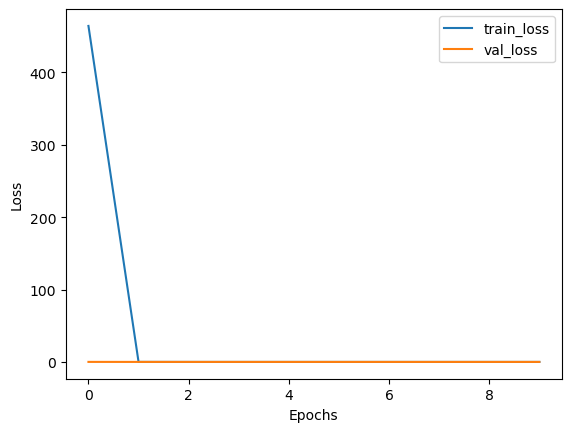

In [7]:
# Plot performance on training and validation set
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
# Screenshot and visualization of output
y_predicted = model.predict(X_test)

3/3 [==============================] - 3s 1s/step


In [9]:
output = pd.DataFrame({"Predicted":y_predicted.reshape(74),"Actual":y_test})
output[8:13]

,Predicted,Actual
8,0.265155,0.293079
9,0.191463,0.202313
10,0.260854,0.278711
11,0.219025,0.186652
12,0.238035,0.101280


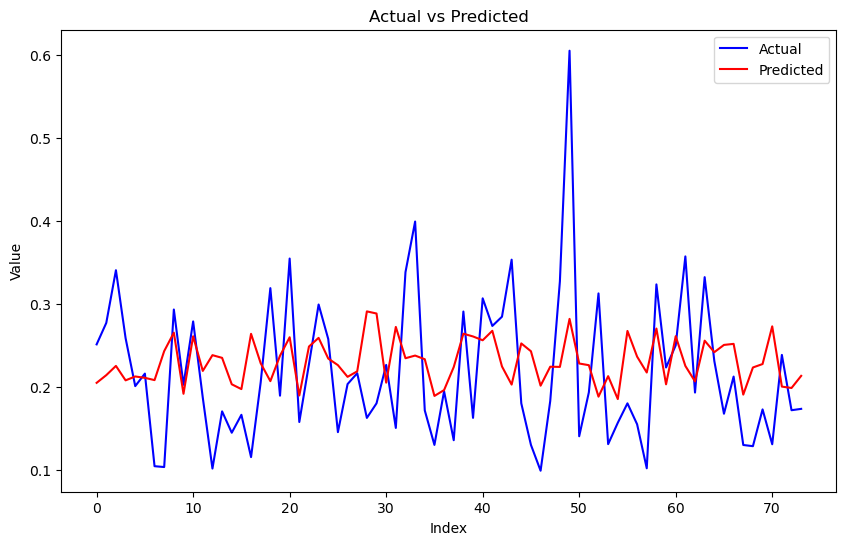

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_predicted, label='Predicted', color='red')
plt.title('Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [11]:
# Performance on test set
loss = model.evaluate(X_test, y_test)
print("\nTest Loss (mse):", loss[0])
print("\nMean Absolute Percentage Error:", loss[1])

3/3 [==============================] - 4s 1s/step - loss: 0.0075 - mean_absolute_percentage_error: 37.7094

Test Loss (mse): 0.007480929605662823

Mean Absolute Percentage Error: 37.70935821533203
